# HDDA. Home Assignment 1

In this homework you need to implement your version of the PCA in case you chose the base level, and SparcePCA in case you are a champion. 

- The task consists of three stages. At the first stage, you are invited to demonstrate PCA on a classic dataset. You need to work with and explain why there is a loss of information.

- In the next step, you need to implement an algorithm that matches the level you selected (basic = PCA, champion = SparcePCA), and to test your implementation on a simple synthetic example in which the main components are well identified.

- The third stage is a creative task. You are offered a dataset from the kaggle contest. You are required to solve this task, provide your decisions with comments on why one or another step was taken. After the deadline, we will review your decisions in a discussion format.

## Case 1: Recap

To begin with, we consider the demonstration case of classifying sets that are well separable. We use the function of generating multidimensional blobs from the `sklearn` module.

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples = 10000, n_features = 5, random_state = 101, centers=4,
                  cluster_std=[5.1, 4.2, 5.3, 2.4],
                  center_box=(-10.0, 10.0),
                  shuffle=True)

Draw the resulting set by using `pyplot` from `matplotlib`

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

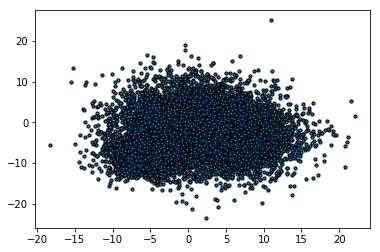

In [5]:
plt.scatter(X[:,0], X[:,1], s=10, edgecolor='k')

gloom...

Okay. Let's see the projections on the first two axes.

In [7]:
# make a color map
color_map = dict(zip([0,1,2,3], ["red", "blue", "green", "yellow"]))

{<matplotlib.collections.PathCollection at 0x1124aed68>,
 <matplotlib.collections.PathCollection at 0x1125288d0>}

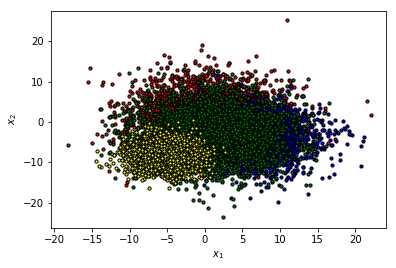

In [8]:
# draw original set by using simple for comprehension
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
{plt.scatter(X[y == k, 0], X[y == k, 1], c=v, s=10, edgecolor='k') for (k,v) in color_map.items()}   

Nice! Now let's see what we have with clustering

In [9]:
from sklearn.cluster import KMeans

In [10]:
#Set a 4 KMeans clustering
kmeans_test = KMeans(n_clusters = 4)

In [11]:
#Compute cluster centers and predict cluster indices
X_test = kmeans_test.fit_predict(X)

In [12]:
import numpy as np
# make a color map for predicted cluster indices
kmeans_color_map = dict(zip(np.unique(kmeans_test.labels_), ["red", "blue", "green", "yellow"]))

{<matplotlib.collections.PathCollection at 0x113897390>,
 <matplotlib.collections.PathCollection at 0x113897eb8>}

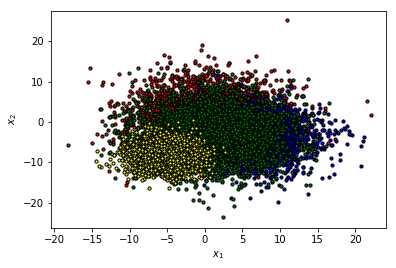

In [13]:
# draw clustered set
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
{plt.scatter(X[y == k, 0], X[y == k, 1], c=v, s=10, edgecolor='k') for (k,v) in kmeans_color_map.items()} 

Ok! What about clustering metrics? Let's see all of them.

In [14]:
from sklearn import metrics

In [15]:
print('ARI: '+str(metrics.adjusted_rand_score(y, kmeans_test.labels_)))
print('AMI: '+str(metrics.adjusted_mutual_info_score(y, kmeans_test.labels_)))
print('Homogenity: '+str(metrics.homogeneity_score(y, kmeans_test.labels_)))
print('Completeness: '+str(metrics.completeness_score(y, kmeans_test.labels_)))
print('V-measure: '+str(metrics.v_measure_score(y, kmeans_test.labels_)))
print('Silhouette: '+str(metrics.silhouette_score(X, kmeans_test.labels_)))

ARI: 0.8244871756050167
AMI: 0.7960631767125773
Homogenity: 0.7961294036284814
Completeness: 0.7972322989538198
V-measure: 0.7966804695893384


Silhouette: 0.32688315686950803


For more info you can use [7 topic of ODS Course](https://www.kaggle.com/kashnitsky/topic-7-unsupervised-learning-pca-and-clustering).

Russian version of the article [here](https://habr.com/company/ods/blog/325654/)

Now let's check how much components have influence in terms of explained variance. The [article](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html#explained-variance) can help you to realize the concept of explained variance. Here is the support function below: for plotting ` explained variance/principle components` flat. 

In [17]:
# survice function for Explained variance ratio plotting
def plot_explained_variance(X):
    #Calculating Eigenvecors and eigenvalues of Covariance matrix
    mean_vec = np.mean(X, axis=0)
    cov_mat = np.cov(X.T)
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    # Create a list of (eigenvalue, eigenvector) tuples
    eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

    # Sort from high to low
    eig_pairs.sort(key = lambda x: x[0], reverse= True)

    # Calculation of Explained Variance from the eigenvalues
    tot = sum(eig_vals)
    var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
    cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
    plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')

To use it properly it would be better to use [Feature Scaling](http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)
by using `StandardScaler` from the `sklearn` preprocessing.

In [18]:
from sklearn.preprocessing import StandardScaler

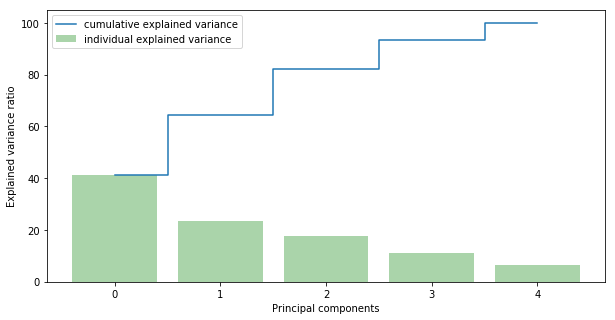

In [19]:
X_std = StandardScaler().fit_transform(X)
plot_explained_variance(X_std)

The plot above clearly shows that most of the variance can be explained by the 4 first principal components. But to see more in detail, let's look at the correlation matrix. To do this, we first wrap the data in the `DataFrame` (`pandas` module) and then use the `heatmap` from `seaborn` module.

In [20]:
import seaborn as sns
import pandas as pd

In [21]:
columns = ['feature_' + str(x) for x in np.arange(1, 7, 1)]
d = {key: values for key, values in zip(columns, X.T)}
data = pd.DataFrame(d)

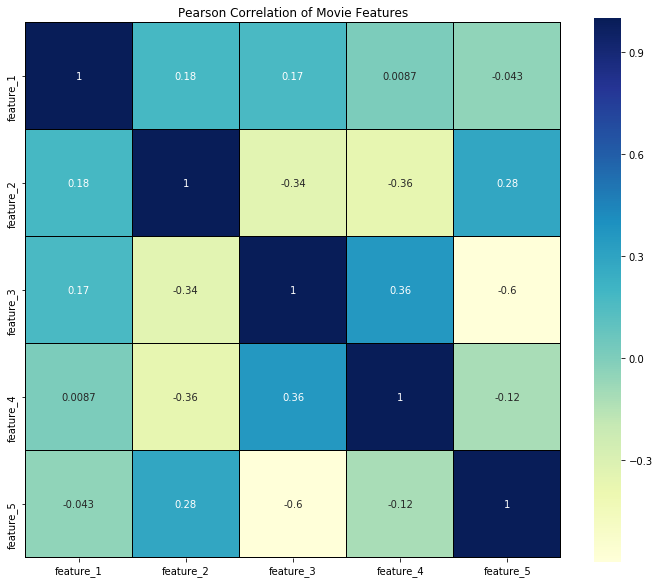

In [22]:
f, ax = plt.subplots(figsize=(12,10))
plt.title('Pearson Correlation of Movie Features')
sns.heatmap(data.astype(float).corr(), linewidths=0.25, vmax=1.0, square=True,
           cmap="YlGnBu", linecolor='black', annot=True)

So, it's time to use PCA. Let's try it with 4 components and and see what happens

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=4)
X_transformed = pca.fit_transform(X_std)

{<matplotlib.collections.PathCollection at 0x11391a0f0>,
 <matplotlib.collections.PathCollection at 0x11392df98>}

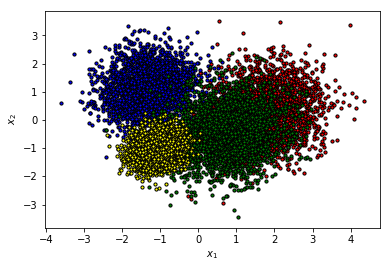

In [25]:
# draw transformed set using simple for comprehension
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
{plt.scatter(X_transformed[y == k, 0], X_transformed[y == k, 1], c=v, s=10, edgecolor='k') for (k,v) in color_map.items()} 

In [26]:
#Set a 4 KMeans clustering
kmeans = KMeans(n_clusters = 4)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(X_transformed)

print('ARI: '+str(metrics.adjusted_rand_score(y, kmeans.labels_)))
print('AMI: '+str(metrics.adjusted_mutual_info_score(y, kmeans.labels_)))
print('Homogenity: '+str(metrics.homogeneity_score(y, kmeans.labels_)))
print('Completeness: '+str(metrics.completeness_score(y, kmeans.labels_)))
print('V-measure: '+str(metrics.v_measure_score(y, kmeans.labels_)))
print('Silhouette: '+str(metrics.silhouette_score(X, kmeans.labels_)))

ARI: 0.8036525289442926
AMI: 0.7748583603002579
Homogenity: 0.7749314733666173
Completeness: 0.7764380611659785
V-measure: 0.7756840357169325


Silhouette: 0.3246824733137969


It is obvious that there was a loss of information and the quality of clustering has greatly decreased. Try to explain this fact.

### Task 1: Explain why in the example above there was a loss of information

In [44]:
# YOUR ANSER HERE
lost_variance_percent = 100 * (1 - np.sum(pca.explained_variance_ratio_))
print("Lost variance ratio = %.1f%%" %(lost_variance_percent))

Lost variance ratio = 6.6%


There's 6.6% of the vairance has been lost by reducing the number of components to 4, Which will certainly lead to a loss of information.

## Case 2: A Synthetic Example

A synthetic example contains 10 features, each of which is a simple linear combination of three values: $V1, V2, V3$

$$V_1 \sim N(0, 290)$$
$$V_2 \sim N (0, 300)$$
$$V_3 = −0.3 V_1 + 0.925 V_2 + \epsilon, \ \epsilon \sim N(0, 1)$$

You need to find out how much of this data set has the main components, and compare the speed of your PCA implementation (SPCA) and the implementation of the library version.

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# The first column contains numbers, so we'll drop it away

df = pd.read_csv("./synthetic.csv").drop(['Unnamed: 0'], axis=1)

In [ ]:
df.describe()

In [ ]:
# Do not forget to use the scaling
X_std = StandardScaler().fit_transform(df.values)

# Determine the number of main components.
# YOUR CODE HERE




In [ ]:
# Check the covariation matrix by using sns.heatmap(...) (optionally)
# YOUR CODE HERE


We will test your hypothesis and measure the running time of the library versions of the algorithms

In [ ]:
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA

In [ ]:
pca = PCA(n_components=???)
x_d = pca.fit_transform(X_std)
plt.scatter(x_d[:,0],x_d[:,1], s=10, edgecolor='k')

In [ ]:
%timeit pca.fit_transform(X_std)

In [ ]:
spca = SparsePCA(n_components=???)
x_d = spca.fit_transform(X_std)
plt.scatter(x_d[:,0],x_d[:,1], s=10, edgecolor='k')

In [ ]:
%timeit spca.fit_transform(X_std)

### Task 2: Implement you version of PCA (or SPCA) and using template above check it time performance

#### PCA

In [ ]:
# YOUR IMPLEMENTATION OF PCA (FOR NOVICES)
class myPCA():
    def __init__(self, n_components=None):
        # YOUR CODE HERE
    def fit_transform(self, X, y=None):
        # YOUR CODE HERE

In [ ]:
pca = myPCA(n_components=???)

In [ ]:
# TEST TIME PERFORMANCE OF YOUR PCA
%timeit pca.fit_transform(X_std)

In [ ]:
# DRAW RESULTS
x_d = pca.fit_transform(X_std)
plt.scatter(x_d[:,0],x_d[:,1], s=10, edgecolor='k')

#### SparcePCA (for champions)

In [ ]:
# YOUR IMPLEMENTATION OF SparcePCA (FOR CHAMPIONS)
class mySparcePCA():
    def __init__(self, n_components=None):
        # YOUR CODE HERE
    def fit_transform(self, X, y=None):
        # YOUR CODE HERE

In [ ]:
spca = mySparcePCA(n_components=???)

In [ ]:
# TEST TIME PERFORMANCE OF YOUR SPCA
%timeit spca.fit_transform(X_std)

In [ ]:
# DRAW RESULTS
x_d = spca.fit_transform(X_std)
plt.scatter(x_d[:,0],x_d[:,1], s=10, edgecolor='k')

## Case 3: Сreative task

I offer your to have a practive with your implementation on [TMDB 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata) Kaggle dataset. 

You need to identify the number of main components and make clustering using Kmeans.

- Preliminary preparation of the dataset: get rid of zero values, transform categorical features.

- Scale the dataset (use StandardScaler or anything you want).

- Identify the number of main components (demonstrate the analysis toolkit).

- Reduce the dimensionality of the space by using your PCA implementation (SPCA).

- Cluster the dataset by Kmeans algo.

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("./tmdb_5000_movies.csv")

In [ ]:
df.describe()